## February Dashboard

#### Objectives
- Increase the overall number of movements in my catalog by adding 3 new movements per muscle group.
- Find my sweet spot for volume lifted per muscle group.

#### Plan
To begin with, for each muscle group, I'll grab my movement data and isolate a `set` of movements from dates preceding February 3, 2022 (the date these goals were set). I will then create a `set` of all movements performed for that muscle group and filter out the one's previously recorded. This should give me my set of unique new movements per muscle group! We will plot these with an X label of muscle groups, and a Y value of `len(set)`. This will show us unique new movement counts for each muscle group.

Then, we will create filtered sets of movements per muscle group, and using them, plot each muscle group on a cartesian plane with an X axis measuring time, and a Y axis measuring weight in lbs. This will show us our trend over the month for each muscle group. We will be looking for a plateu around the middle/end of the month that will indicate our ideal. 

#### Assumptions
The workout data recorded is generated from Apple Fitness and the `workout-cli` Python application in this library. Each workout is designed to reach my limits, and every movement is performed with the utmost attention paid to proper form. This means that any data populating the volume-by-time graph can be considered within reasonable deviation from my best efforts.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Unique movements per muscle group
First, we isolate our sets of movements per muscle group. We'll start by reading in and observing our dataframe.

In [16]:
movements_df = pd.read_csv('../data/movements-log.csv', index_col=0)
movements_df.tail()

,workout_id,name,group,sets,reps,weight,volume
34,ab8296ee-87a3-448d-8ec4-4df7f4699c93,db shoulder press,shoulder,3,10,50.0,1500.0
35,ab8296ee-87a3-448d-8ec4-4df7f4699c93,db lateral raise,shoulder,3,6,30.0,540.0
36,ab8296ee-87a3-448d-8ec4-4df7f4699c93,cable tri pulldown,tricep,3,8,37.5,900.0
37,ab8296ee-87a3-448d-8ec4-4df7f4699c93,db hammer curl,bicep,5,8,40.0,1600.0
38,ab8296ee-87a3-448d-8ec4-4df7f4699c93,db tri extension,tricep,5,8,20.0,800.0


Next, let's observe the unique values within our `name` column.

In [77]:
set(movements_df.name)

{'cable axes',
 'cable face pull',
 'cable hammer curl',
 'cable lat pulldown',
 'cable pull through',
 'cable row',
 'cable tri pulldown',
 'calf raises',
 'chin up',
 'db chest press',
 'db curl',
 'db delt raise',
 'db fly',
 'db front raise',
 'db hammer curl',
 'db lateral raise',
 'db row',
 'db shoulder press',
 'db tri extension',
 'db tri press',
 'incline db chest press',
 'lunges',
 'pull up',
 'rdl',
 'single-leg rdl',
 'squat',
 'step ups',
 'walking lunges'}

Our delta group will only start with movements added after February 3, 2022. To do this, we'll read in the Workouts dataframe, grab the `id` of each workout prior to February 3, 2022, and use them to filter out those workouts from our dataframe.

In [106]:
workouts_df = pd.read_csv('../data/workouts-log.csv', index_col=0)

# Convert date column to DateTime and create cutoff for comparison
workouts_df.date = pd.to_datetime(workouts_df.date, format="%Y-%m-%d %H:%M:%S")
cutoff = pd.to_datetime('2022-02-02 23:59:59')

accepted_ids = workouts_df[workouts_df.date > cutoff].id.unique()
accepted_ids

array(['8d5eb0c6-dd34-4930-b780-7d5fa07d6be6',
       'ab8296ee-87a3-448d-8ec4-4df7f4699c93'], dtype=object)

In [75]:
# Sanity check; did it work? The workout_ids above should not appear in accepted_ids
movements_df[~movements_df.workout_id.isin(accepted_ids)].tail()

,workout_id,name,group,sets,reps,weight,volume
20,a802b62d-6662-40c7-9a5b-95bb5696c491,cable lat pulldown,back,5,10,65.0,3250.0
21,a802b62d-6662-40c7-9a5b-95bb5696c491,cable row,back,5,10,65.0,3250.0
22,a802b62d-6662-40c7-9a5b-95bb5696c491,db front raise,shoulder,5,7,30.0,1050.0
23,a802b62d-6662-40c7-9a5b-95bb5696c491,db shoulder press,shoulder,5,5,50.0,1250.0
24,a802b62d-6662-40c7-9a5b-95bb5696c491,cable axes,core,5,20,22.5,2250.0


In [80]:
# Filter out those names that appear before February 3, 2022
pre_cutoff = movements_df[~movements_df.workout_id.isin(accepted_ids)]
post_cutoff = movements_df[movements_df.workout_id.isin(accepted_ids)]

new_movements = post_cutoff[~post_cutoff.name.isin(pre_cutoff.name.unique())]
new_movements

,workout_id,name,group,sets,reps,weight,volume
25,8d5eb0c6-dd34-4930-b780-7d5fa07d6be6,lunges,quads,5,14,60.0,4200.0
26,8d5eb0c6-dd34-4930-b780-7d5fa07d6be6,cable pull through,hamstrings,5,12,32.5,1950.0
33,ab8296ee-87a3-448d-8ec4-4df7f4699c93,cable face pull,shoulder,5,10,32.5,1625.0
35,ab8296ee-87a3-448d-8ec4-4df7f4699c93,db lateral raise,shoulder,3,6,30.0,540.0
37,ab8296ee-87a3-448d-8ec4-4df7f4699c93,db hammer curl,bicep,5,8,40.0,1600.0
38,ab8296ee-87a3-448d-8ec4-4df7f4699c93,db tri extension,tricep,5,8,20.0,800.0


### Visualization
First, let's unpack that dictionary from earlier.

In [262]:
x = new_movements.group.unique()
y = new_movements.groupby(new_movements.group).count().drop(columns=['workout_id', 'sets', 'reps', 'weight', 'volume']).name
y

group
bicep         1
hamstrings    1
quads         1
shoulder      2
tricep        1
Name: name, dtype: int64

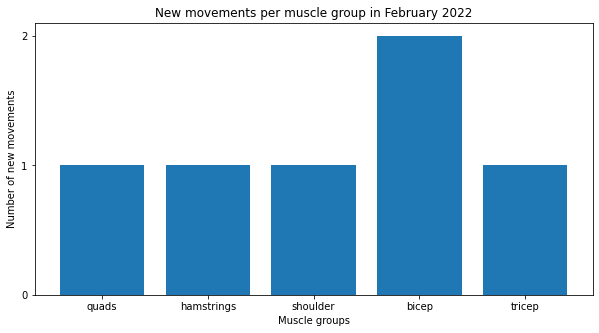

In [266]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, y)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 1))
ax.set_xlabel('Muscle groups')
ax.set_ylabel('Number of new movements')
ax.set_title('New movements per muscle group in February 2022');

### Progress on volume lifted per muscle group
These operations will be much easier utilizing the Volumes table rather than summing up all the individual movements.

In [179]:
volumes_df = pd.read_csv('../data/volumes-log.csv', index_col=0)
workouts_df.rename(columns={'id': 'workout_id'}, inplace=True)
workouts_df

,workout_id,date,duration,cals,split
,,,,,
0,95fa9054-69a0-4dd6-a660-ecb9f7cf54b0,2022-01-30 13:50:00,47:54,418,upper
1,ab2e2469-ffcf-4c3b-a6b8-0cd18a3936a0,2022-01-31 08:05:00,34:42,290,lower
2,a802b62d-6662-40c7-9a5b-95bb5696c491,2022-02-02 07:22:00,66:39,462,upper
3,8d5eb0c6-dd34-4930-b780-7d5fa07d6be6,2022-02-03 07:42:00,39:03,301,lower
4,ab8296ee-87a3-448d-8ec4-4df7f4699c93,2022-02-04 16:54:00,48:34,389,upper


Let's merge this with our Workouts dataframe since each one has a unique indentifier in the `workout_id` column.

In [258]:
merged_df = pd.merge(volumes_df, workouts_df, on='workout_id', how='left')
merged_df = merged_df[merged_df.workout_id.isin(accepted_ids)]
merged_df

,workout_id,total_vol,ch_vol,bi_vol,tri_vol,shld_vol,back_vol,core_vol,quad_vol,ham_vol,cf_vol,date,duration,cals,split
3,8d5eb0c6-dd34-4930-b780-7d5fa07d6be6,15250.0,0.0,0.0,0.0,0.0,0.0,0.0,6650.0,4400.0,4200.0,2022-02-03 07:42:00,39:03,301,lower
4,ab8296ee-87a3-448d-8ec4-4df7f4699c93,11765.0,0.0,4400.0,3700.0,3665.0,0.0,0.0,0.0,0.0,0.0,2022-02-04 16:54:00,48:34,389,upper


I'm awaiting about another 5-6 workouts before I end up plotting this data.